In [2]:
import pandas as pd

df=pd.read_csv('CreditDefaultIndices.csv')

df.head

<bound method NDFrame.head of             Date  SPX Index   VIX Index  (L1)  \
0     2024-02-16     5005.57            14.24   
1     2024-02-15     5029.73            14.01   
2     2024-02-14     5000.62            14.38   
3     2024-02-13     4953.17            15.85   
4     2024-02-12     5021.84            13.93   
...          ...         ...              ...   
3538  2010-02-26     1104.49            19.50   
3539  2010-02-25     1102.94            20.10   
3540  2010-02-24     1105.24            20.27   
3541  2010-02-23     1094.60            21.37   
3542  2010-02-22     1108.02            19.94   

      Freddie Mac 30 Year Mortgage Rate  \
0                                  7.31   
1                                  7.24   
2                                  7.29   
3                                  7.25   
4                                  7.14   
...                                 ...   
3538                               5.08   
3539                               5.

In [9]:
df.isnull().any()

Date                                           False
SPX Index                                       True
VIX Index  (L1)                                 True
Freddie Mac 30 Year Mortgage Rate               True
U.S. 5-year Treasury constant maturity rate     True
CDX HY Spread                                   True
CDX IG Spread                                   True
dtype: bool

<AxesSubplot:>

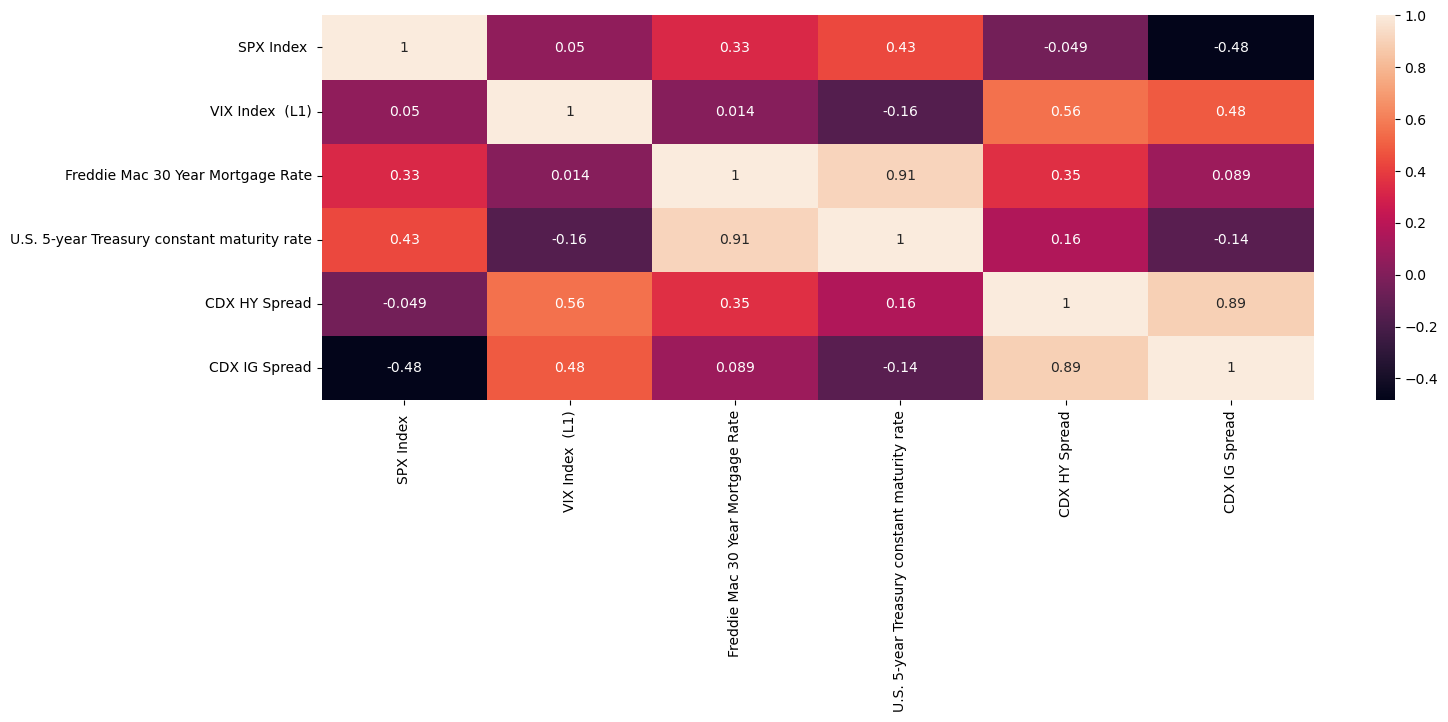

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize = (16,5))
corr = df.select_dtypes('number').corr()
sn.heatmap(corr,annot=True)

In [4]:
cleaned_df=df.dropna()

In [5]:
cleaned_df.head

<bound method NDFrame.head of             Date  SPX Index   VIX Index  (L1)  \
0     2024-02-16     5005.57            14.24   
1     2024-02-15     5029.73            14.01   
2     2024-02-14     5000.62            14.38   
3     2024-02-13     4953.17            15.85   
4     2024-02-12     5021.84            13.93   
...          ...         ...              ...   
2915  2012-08-14     1403.93            14.85   
2916  2012-08-13     1404.11            13.70   
2917  2012-08-10     1405.87            14.74   
2918  2012-08-09     1402.80            15.28   
2919  2012-08-08     1402.22            15.32   

      Freddie Mac 30 Year Mortgage Rate  \
0                                  7.31   
1                                  7.24   
2                                  7.29   
3                                  7.25   
4                                  7.14   
...                                 ...   
2915                               3.57   
2916                               3.

from statsmodels.tsa.arima.model import ARIMA

df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date')

train_df=df[:'2022-07-05']
test_df=df['2022-07-06':]

mode=ARIMA(train_df,order=(5,1,0))
model_fit=model.fit()

print(model_fit.summary())

In [23]:
endog=cleaned_df['CDX IG Spread']
exdog=cleaned_df.drop(columns=['CDX IG Spread'])

In [38]:
cleaned_df['Date']=pd.to_datetime(cleaned_df['Date'],errors='coerce')
cleaned_df.set_index('Date')

,SPX Index,VIX Index (L1),Freddie Mac 30 Year Mortgage Rate,U.S. 5-year Treasury constant maturity rate,CDX HY Spread,CDX IG Spread
Date,,,,,,
2024-02-16,5005.57,14.24,7.31,4.29,346.692,53.184
2024-02-15,5029.73,14.01,7.24,4.22,341.624,52.343
2024-02-14,5000.62,14.38,7.29,4.25,350.427,54.015
2024-02-13,4953.17,15.85,7.25,4.31,354.456,55.056
2024-02-12,5021.84,13.93,7.14,4.13,345.338,53.619
...,...,...,...,...,...,...
2012-08-14,1403.93,14.85,3.57,0.75,553.750,103.000
2012-08-13,1404.11,13.70,3.56,0.71,554.523,102.750
2012-08-10,1405.87,14.74,3.61,0.71,552.893,102.751


In [39]:
cleaned_df=cleaned_df.sort_index()

In [48]:
cleaned_df.dropna(subset=['Date'],inplace=True)

In [51]:
cleaned_df.isnull().any()

Date                                           False
SPX Index                                      False
VIX Index  (L1)                                False
Freddie Mac 30 Year Mortgage Rate              False
U.S. 5-year Treasury constant maturity rate    False
CDX HY Spread                                  False
CDX IG Spread                                  False
dtype: bool

In [52]:
cleaned_df.index = pd.to_datetime(cleaned_df.index.astype(str))

ParserError: day is out of range for month: 0

In [46]:
print(type(cleaned_df.index))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(endog,exdog=exdog,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\saish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      CDX IG Spread   No. Observations:                 2862
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6594.322
Date:                            Mon, 26 Feb 2024   AIC                          13198.644
Time:                                    10:58:45   BIC                          13228.417
Sample:                                         0   HQIC                         13209.381
                                           - 2862                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3880      0.166     -2.335      0.020      -0.714      -0.062
ma.L1          0.3565      0.170   

In [57]:
cleaned_df['fitted']=results.fittedvalues
forecast=results.get_forecast(steps=12)
df_forecast=forecast.summary_frame()

C:\Users\saish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


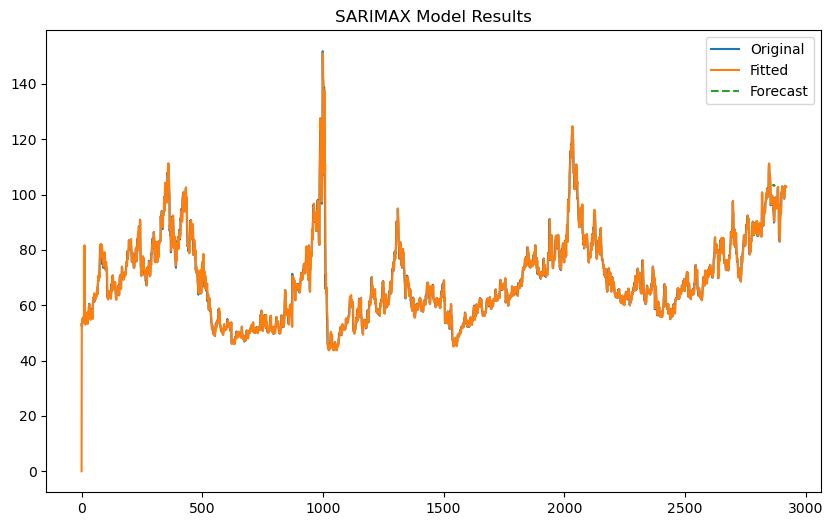

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df.index, endog, label='Original')
plt.plot(cleaned_df.index, cleaned_df['fitted'], label='Fitted')
plt.plot(df_forecast.index, df_forecast['mean'], label='Forecast', linestyle='--')
plt.fill_between(df_forecast.index, df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='k', alpha=0.1)
plt.title('SARIMAX Model Results')
plt.legend()
plt.show()